In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [19]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [20]:
data.shape

(7920, 3)

Check for duplications in data

In [21]:
data.duplicated().sum()

0

Check for null values

In [22]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [23]:
import re
import string

convert uppercase to lowercase

In [24]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [25]:
data["tweet"]

0       #fingerprint #pregnancy test https://goo.gl/h1...
1       finally a transparant silicon case ^^ thanks t...
2       we love this! would you go? #talk #makememorie...
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

In [26]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [27]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [28]:
data["tweet"].head(5)


0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Punctuations

In [29]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuation)

In [30]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Remove Numbers

In [31]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

Remove Stopwords

In [32]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


Download Stopwords List

In [33]:
import nltk
nltk.download('stopwords', download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
with open("../static/model/corpora/stopwords/english", 'r') as file:
    sw = file.read().splitlines()


In [35]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

Stemming

In [37]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [38]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [39]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [40]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [41]:
from collections import Counter
vocab = Counter()

In [42]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [43]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [44]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [45]:
len(vocab)

15949

Handling Overfitting issue

In [46]:
tokens = [key for key in vocab if vocab[key] > 10]

In [47]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [48]:
def save_vocabulary(lines, filename): 
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide Dataset

In [49]:
x = data['tweet']
y = data['label']

In [53]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl (9.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [57]:
x_train

458     soni xperia z unbox newphon freeupgrad soni xp...
809     peac smile happi offic mate smile soni photogr...
5468                               aw ff get iphon itun u
4486    gain follow rt must follow follow back follow ...
632     event soni year dressedup sonytv congratul com...
                              ...                        
106             day ps love iphon photographi book flickr
1670    si childhood kik instagood sister girl young p...
7646    sweet lord iphon gold iphonegold mirror selfi ...
3243    reallyr w photobooth iphon ipad date colleg so...
673     blue blow dugan rule origin news photographi f...
Name: tweet, Length: 5940, dtype: object

In [58]:
len(x_train)

5940

In [59]:
len(y_train)

5940

Vectorization

In [60]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = i

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [61]:
vectorized_x_train = vectorizer(x_train, tokens)

In [70]:
vectorized_x_test = vectorizer(x_test, tokens)

In [62]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Dataset Balance

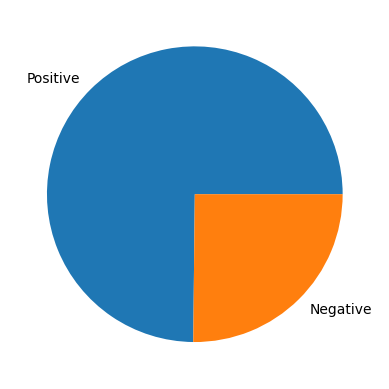

In [63]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

Handle Unbalanced Dataset

In [64]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 656.4 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.6 kB 751.6 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/235.6 kB 774.0 kB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.6 kB 748.1 kB/s eta 0:00:01
   ------------------------------------ - 225.3/235.6 kB 811.5 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 758.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


SMOTEing Dataset

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(8890, 1145) (8890,)


Balanced Dataset Chart

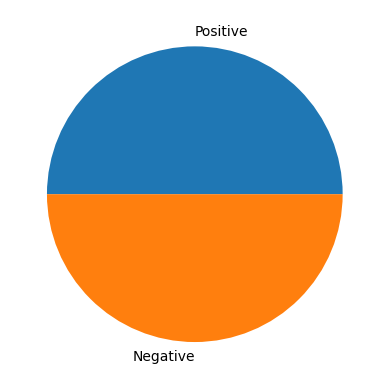

In [66]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Model Training and Evaluation

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [68]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

#### Testing Various Classification Algorithms

Logistic Regression

In [72]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.963
	Precision = 0.949
	Recall = 0.979
	F1-Score = 0.964
Testing Scores:
	Accuracy = 0.831
	Precision = 0.686
	Recall = 0.68
	F1-Score = 0.683


c:\Users\samee\Dev\text_sentiment_analyzer\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [73]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.891
	Precision = 0.857
	Recall = 0.938
	F1-Score = 0.896
Testing Scores:
	Accuracy = 0.848
	Precision = 0.672
	Recall = 0.851
	F1-Score = 0.751


Decision Tree

In [74]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.821
	Precision = 0.662
	Recall = 0.68
	F1-Score = 0.671


Random Forest

In [75]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.869
	Precision = 0.774
	Recall = 0.723
	F1-Score = 0.748


Support Vector Machine

In [76]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.957
	Precision = 0.931
	Recall = 0.987
	F1-Score = 0.958
Testing Scores:
	Accuracy = 0.828
	Precision = 0.675
	Recall = 0.691
	F1-Score = 0.683


#### Saving the Model

Selected Algorithm: Logistic Regression

In [77]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)